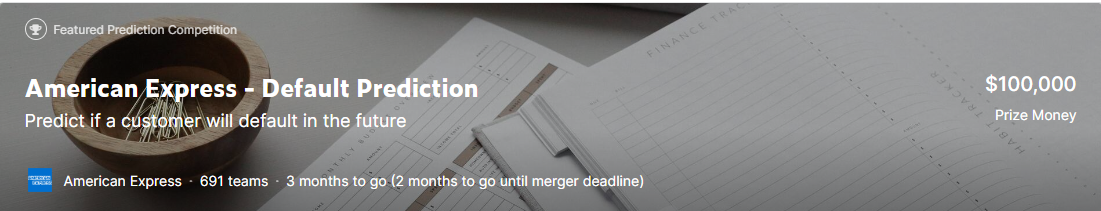

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import os
import pickle
import sys
import warnings
from glob import glob
import missingno as msno
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.imputation import mice
import folium

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import xgboost
from scipy.stats import spearmanr
from sklearn.ensemble import (
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor)

In [ ]:
label = pd.read_csv('../input/amex-default-prediction/train_labels.csv')
label

In [ ]:
train = pd.read_feather('../input/amexfeather/train_data.ftr')
#test = pd.read_feather('../input/amexfeather/test_data.ftr')

In [ ]:
train

In [ ]:
l =train.columns.tolist()
l.remove('customer_ID')
l.remove('S_2')
l.remove('D_63')
l.remove('D_64')
l.remove('target')

# 最頻値補完

In [ ]:
for i in l:
    train[i] = train[i].fillna(train[i].mode()[0])

# 外れ値

In [ ]:
fa = train[train.target==1].reset_index(drop=True)[:1000]
su = train[train.target==0].reset_index(drop=True)[:1000]

In [ ]:
train_df = fa
train_df['no']  = train_df.index
train_df

In [ ]:
#'''
clf = IsolationForest(n_estimators=100, random_state=42)
for i in l:
    clf.fit(train_df[['no',i]])
    predict = clf.predict(train_df[['no',i]])
    sns.scatterplot(x=train_df.index, y="P_2", data=train_df, hue=predict, palette='bright')
    break
#'''

In [ ]:
clf = LocalOutlierFactor(n_neighbors=100)
fig = plt.figure(figsize=(30,90))
x=1
for i in l:
    predict = clf.fit_predict(train_df[[i]])
    fig.add_subplot(32, 6, x)
    sns.scatterplot(x='no', y=i, data=train_df, hue=predict, palette='bright')
    x+=1
    #break

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Heatmap</span>

In [ ]:
'''
for x in range(2,179,20):
    plt.figure(figsize=(20,8))
    sns.heatmap(train.iloc[:,x:x+20].corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
    plt.show()
    '''

In [ ]:
fa.describe()

In [ ]:
su.describe()

In [ ]:
for x in l:
    fig = plt.figure(figsize=(10,5))
    fig.add_subplot(1,2, 1)
    plt.plot(fa[x])
    plt.title('Traget =1 {}'.format(x))
    fig.add_subplot(1,2, 2)
    plt.plot(su[x], color='forestgreen')
    plt.title('Target =0 {}'.format(x))